# $sigmoid$逻辑回归实战

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
Num = 100

In [3]:
x_1 = np.random.normal(6, 1, size = (Num))
x_2 = np.random.normal(3, 1, size = (Num))
y = np.ones(Num)
c_1 = np.array([x_1, x_2, y])

In [4]:
x_1 = np.random.normal(3, 1, size = (Num))
x_2 = np.random.normal(6, 1, size = (Num))
y = np.zeros(Num)
c_0 = np.array([x_1, x_2, y])
c_0.shape

(3, 100)

In [5]:
c_1 = c_1.T
c_0 = c_0.T

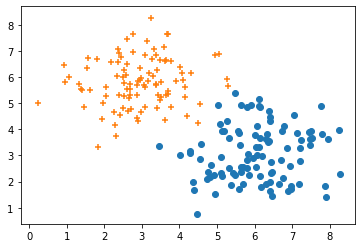

In [6]:
plt.scatter(c_1[:, 0], c_1[:, 1])
plt.scatter(c_0[:, 0], c_0[:, 1], marker="+")

In [7]:
All_data = np.concatenate((c_0, c_1), axis = 0)
np.random.shuffle(All_data)
All_data.shape

(200, 3)

In [8]:
train_data_X = All_data[:150, :2]
train_data_y = All_data[:150, -1]
test_data_X = All_data[150:, :2]
test_data_y = All_data[150:, -1]
train_data_X.shape, train_data_y.shape

((150, 2), (150,))

# 建立回归模型
$y = {w_1 * x_1} + {w_2 * x_2}$

In [9]:
W = np.random.rand(2, 1)
W

array([[0.05853492],
       [0.4706209 ]])

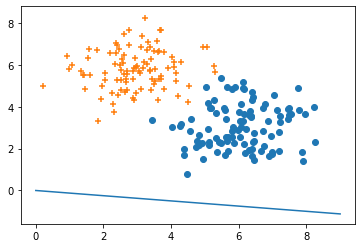

In [10]:
# 因为y = 0
# 所以w1 * x1 + w2 * x2 = 0
# 在运算过程中把x1看成x, 把x2看成y
# y = -(w1 * x1) / w2
x = np.arange(10)
y = -(W[0] * x) / W[1]
plt.scatter(c_1[:, 0], c_1[:, 1])
plt.scatter(c_0[:, 0], c_0[:, 1], marker="+")
plt.plot(x, y)

In [11]:
# 定义损失函数
def crossEntropy(y, y_hat):
    return -np.mean(  y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat) )

In [12]:
# y_hat = sigmoid(W.T * x)
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [13]:
W.shape, train_data_X.shape

((2, 1), (150, 2))

In [14]:
lr = 0.001
n = 1e4
for i in range(500):
    y_hat = sigmoid( np.dot(W.T, train_data_X.T) )
    loss = crossEntropy(train_data_y, y_hat)
    # 计算梯度
    grad = -np.mean( (train_data_X * (train_data_y - y_hat).T), axis = 0 )
    # 更新梯度
    W = W - (lr * grad).reshape(2, 1)
    if i % 10 == 1:
        print("i = %d, loss = %f, W[0] = %f, W[1] = %f"%(i, loss, W[0], W[1]))
    if loss < 0.1:
        break

i = 1, loss = 1.560843, W[0] = 0.056722, W[1] = 0.465509
i = 11, loss = 1.489196, W[0] = 0.048025, W[1] = 0.440250
i = 21, loss = 1.421265, W[0] = 0.039973, W[1] = 0.415520
i = 31, loss = 1.357182, W[0] = 0.032601, W[1] = 0.391364
i = 41, loss = 1.297032, W[0] = 0.025936, W[1] = 0.367826
i = 51, loss = 1.240846, W[0] = 0.020001, W[1] = 0.344944
i = 61, loss = 1.188601, W[0] = 0.014812, W[1] = 0.322752
i = 71, loss = 1.140220, W[0] = 0.010374, W[1] = 0.301277
i = 81, loss = 1.095577, W[0] = 0.006686, W[1] = 0.280541
i = 91, loss = 1.054504, W[0] = 0.003738, W[1] = 0.260557
i = 101, loss = 1.016796, W[0] = 0.001514, W[1] = 0.241332
i = 111, loss = 0.982225, W[0] = -0.000009, W[1] = 0.222864
i = 121, loss = 0.950546, W[0] = -0.000860, W[1] = 0.205146
i = 131, loss = 0.921507, W[0] = -0.001073, W[1] = 0.188164
i = 141, loss = 0.894858, W[0] = -0.000684, W[1] = 0.171899
i = 151, loss = 0.870357, W[0] = 0.000268, W[1] = 0.156325
i = 161, loss = 0.847773, W[0] = 0.001743, W[1] = 0.141417
i = 

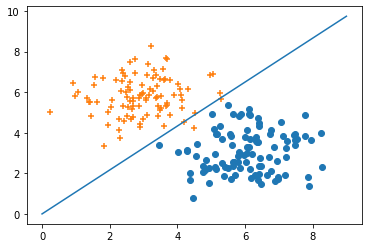

In [15]:
x = np.arange(10)
y = -(W[0] * x) / W[1]
plt.scatter(c_1[:, 0], c_1[:, 1])
plt.scatter(c_0[:, 0], c_0[:, 1], marker="+")
plt.plot(x, y)